# Lab 3 
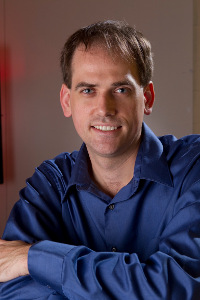

Kyle Johnsen

In [1]:
# Problem 1
import os
enrollment_folder = "enrollment_data"
files = os.listdir(enrollment_folder)
for file in files:
    course_name = file[0:8] # note, would be better to do this with a regular expression, but this is also fine if you know you have such a format
    contents = open(enrollment_folder+"/"+file).read().strip().split("\n")
    withdrawn = int(contents[0])
    taken = len(contents)-1-withdrawn
    print(f"{course_name} - Taken: {taken}, Withdrawn: {withdrawn}")

INFO3287 - Taken: 84, Withdrawn: 13
INFO3451 - Taken: 79, Withdrawn: 13
INFO8043 - Taken: 87, Withdrawn: 5
INFO8130 - Taken: 72, Withdrawn: 12
INFO9372 - Taken: 86, Withdrawn: 9


In [2]:
# Problem 2
# Note that I am solving it from scratch, not using anything from Problem 1, though the early code is similar
import os
enrollment_folder = "enrollment_data"
files = os.listdir(enrollment_folder)
successful_students = set()
# the strategy is to add  all students that were successful (i.e. not withdrawn) to a list for each course
for file in files:
    course_name = file[0:8] # note, would be better to do this with a regular expression, but this is also fine if you know you have such a format
    contents = open(enrollment_folder+"/"+file).read().strip().split("\n")
    withdrawn = int(contents[0])
    successful = contents[1:-withdrawn]
    successful_students.update(successful) # this will add these students to the set
successful_students = sorted(successful_students)
print(f"Number of students who have successfully completed at least one course: {len(successful_students)} [{','.join(successful_students[:3])} ... {','.join(successful_students[-3:])} (see students.txt)")
output_file = open("students.txt","w")
output_file.write('\n'.join(successful_students))
output_file.close()

Number of students who have successfully completed at least one course: 142 [10598252,11187588,11232226 ... 98612453,98697319,99133047 (see students.txt)


In [3]:
# Problem 3
import os
enrollment_folder = "enrollment_data"
files = os.listdir(enrollment_folder)
course_withdrawals = []
# the strategy is to add  all students that were successful (i.e. not withdrawn) to a list for each course
for file in files:
    course_name = file[0:8] # note, would be better to do this with a regular expression, but this is also fine if you know you have such a format
    contents = open(enrollment_folder+"/"+file).read().strip().split("\n")
    withdrawn = int(contents[0])
    withdrawn_students = set(contents[-withdrawn:])
    course_withdrawals.append(withdrawn_students)
    
# now we do a double loop, so we can use set operations, because in order to have multiple withdrawals, there must be an overlap in withdrawals between two courses
multiple_withdrawals = set()
for ws1 in course_withdrawals:
    for ws2 in course_withdrawals:
        if ws1 == ws2: continue 
        overlap = ws1.intersection(ws2)
        multiple_withdrawals.update(overlap)
print(f"Students with multiple withdrawals - {','.join(multiple_withdrawals)}")
        

Students with multiple withdrawals - 35498062,98257340,82863917


In [4]:
# Problem 4 part 1
student_info = {}
import os
enrollment_folder = "enrollment_data"
files = os.listdir(enrollment_folder)
course_withdrawals = []
# the strategy is to add  all students that were successful (i.e. not withdrawn) to a list for each course
for file in files:
    course_name = file[0:8] # note, would be better to do this with a regular expression, but this is also fine if you know you have such a format
    contents = open(enrollment_folder+"/"+file).read().strip().split("\n")
    withdrawn = int(contents[0])
    successful = contents[1:-withdrawn]
    unsuccessful = contents[-withdrawn:]
    for student in unsuccessful:
        if student in student_info:
            student_info[student]["withdrawn"].append(course_name)
        else:
            student_info[student] = {"withdrawn":[course_name],"passed":[]}
    for student in successful:
        if student in student_info:
            student_info[student]["passed"].append(course_name)
        else:
            student_info[student] = {"withdrawn":[],"passed":[course_name]}
print(len(student_info))

150


In [5]:
# Problem 4 Part 2
entry = input("Please enter the student you wish to search for: ").strip()
print("\nsearching ... ",end="")
if entry in student_info:
    print(f"found! Here is the information for student {entry}\n")
    print(f"Courses passed: {','.join(student_info[entry]['passed'])}")
    print(f"Courses withdrawn: {','.join(student_info[entry]['withdrawn'])}")
else: 
    print("not found.")

Please enter the student you wish to search for:  15514015



searching ... found! Here is the information for student 15514015

Courses passed: INFO3287,INFO9372
Courses withdrawn: 


In [6]:
# Problem 5
taken_together = {}
for key,value in student_info.items():
    all_courses = tuple(sorted(value['passed'] + value['withdrawn']))
    if all_courses in taken_together:
        taken_together[all_courses].append(key)
    else:
        taken_together[all_courses] = [key]

for key,value in sorted(taken_together.items(),key=lambda x: len(x[0])):
    print(f"{','.join(key)}: {len(value)}")


INFO3287: 9
INFO3451: 5
INFO8043: 5
INFO8130: 4
INFO9372: 7
INFO3287,INFO9372: 7
INFO3287,INFO8043: 2
INFO3287,INFO3451: 6
INFO3287,INFO8130: 3
INFO3451,INFO8043: 4
INFO3451,INFO8130: 4
INFO3451,INFO9372: 2
INFO8043,INFO9372: 2
INFO8043,INFO8130: 1
INFO3287,INFO8130,INFO9372: 1
INFO3287,INFO3451,INFO8043: 2
INFO3287,INFO8043,INFO9372: 6
INFO3287,INFO8043,INFO8130: 2
INFO3287,INFO3451,INFO9372: 2
INFO3451,INFO8043,INFO9372: 5
INFO3451,INFO8043,INFO8130: 1
INFO3451,INFO8130,INFO9372: 1
INFO8043,INFO8130,INFO9372: 4
INFO3287,INFO3451,INFO8043,INFO8130: 7
INFO3287,INFO3451,INFO8130,INFO9372: 7
INFO3287,INFO8043,INFO8130,INFO9372: 5
INFO3287,INFO3451,INFO8043,INFO9372: 2
INFO3451,INFO8043,INFO8130,INFO9372: 8
INFO3287,INFO3451,INFO8043,INFO8130,INFO9372: 36
